In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
from russian_exports_functions import *

In [30]:
"""## Data Preprocessing"""
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
dataset = pd.read_csv("RUStoWorldTrade.csv", error_bad_lines=False, engine="python")
print(dataset)
print(dataset.nunique())
#Dataset is large, so I will drop all rows with NAN as this shouldn't affect 
#data processing
dataset.dropna(inplace = True)
data_processor(dataset)
#Dropping redundant data fields that don't need to be used in modelling
dataset = dataset.drop(['Classification','index','Partner Code',
'Partner ISO','Reporter Code','Reporter',
'Reporter ISO','Qty Unit Code', 'Qty Unit','Commodity'], axis = 1)
#Reduce project into data entries with a trade (Qty > 0) and EU countries 
dataset = dataset[dataset.Qty != 0.0]
EU_countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 
                'Cyprus', 'Czechia', 'Denmark', 'Estonia',
                'Finland', 'France', 'Germany', 'Greece',
                'Hungary', 'Ireland', 'Italy', 'Latvia',
                'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
                'Poland', 'Portugal', 'Romania', 'Slovakia', 
                'Slovenia', 'Spain', 'Sweden']
dataset = dataset[dataset['Partner'].isin(EU_countries)]
median_trade_value = dataset["Trade Value (US$)"].median()
x = dataset["Trade Value (US$)"]
dataset["Large trades"] = np.select([x < median_trade_value, x >= median_trade_value], [0,1])  
print(dataset)
print(dataset.nunique())
#Display a random value for context
print(dataset.values[1000])

Skipping line 512209: unexpected end of data


         index Classification  Year  Aggregate Level  Is Leaf Code  \
0            0             S4  2011                1             0   
1            1             S4  2012                1             0   
2            2             S4  2015                1             0   
3            3             S4  2016                1             0   
4            4             S4  2017                1             0   
...        ...            ...   ...              ...           ...   
512202  512768             S4  2018                3             0   
512203  512769             S4  2018                3             0   
512204  512770             S4  2018                3             0   
512205  512771             S4  2018                3             0   
512206  512772             S4  2018                3             0   

        Reporter Code            Reporter Reporter ISO  Partner Code  \
0                 643  Russian Federation          RUS           136   
1              

VISUALISING THE TRADE CHANGES OVER THESE PERIODS

[['Austria', 0.0], ['Belgium', 0.0], ['Bulgaria', 0.0], ['Croatia', 0.010381749035851354], ['Cyprus', 0.0], ['Czechia', 0.028502807947810866], ['Denmark', 0.014337912737715107], ['Estonia', 0.013193480804384481], ['Finland', 0.10983263483605911], ['France', 0.05529217705400081], ['Germany', 0.08011233967040458], ['Greece', 0.019446452036839968], ['Hungary', 0.027496315833372413], ['Ireland', 0.006387336537210992], ['Italy', 0.10824955612599725], ['Latvia', 0.021083181429753278], ['Lithuania', 0.030440378807988146], ['Luxembourg', 0.001530803133932469], ['Malta', 0.005060506492381133], ['Netherlands', 0.468652367516298], ['Poland', 0.0], ['Portugal', 0.0], ['Romania', 0.0], ['Slovakia', 0.0], ['Slovenia', 0.0], ['Spain', 0.0], ['Sweden', 0.0]]
[['Austria', 0.0], ['Belgium', 0.0], ['Bulgaria', 0.0], ['Croatia', 0.006618020322999329], ['Cyprus', 0.0], ['Czechia', 0.02649494564673057], ['Denmark', 0.015911104153369143], ['Estonia', 0.01813542205811442], ['Finland', 0.08392595203303745], ['

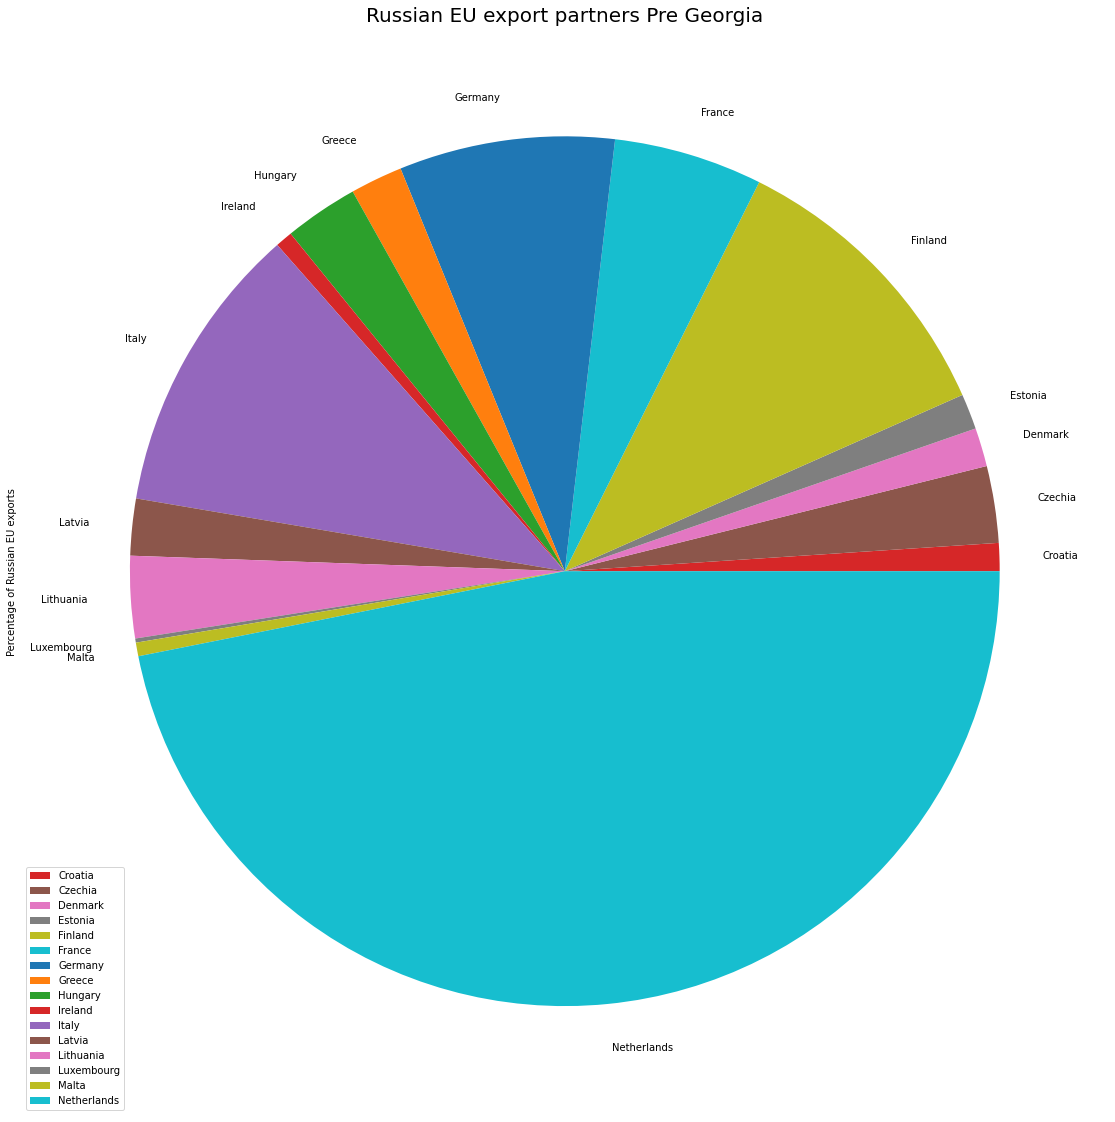

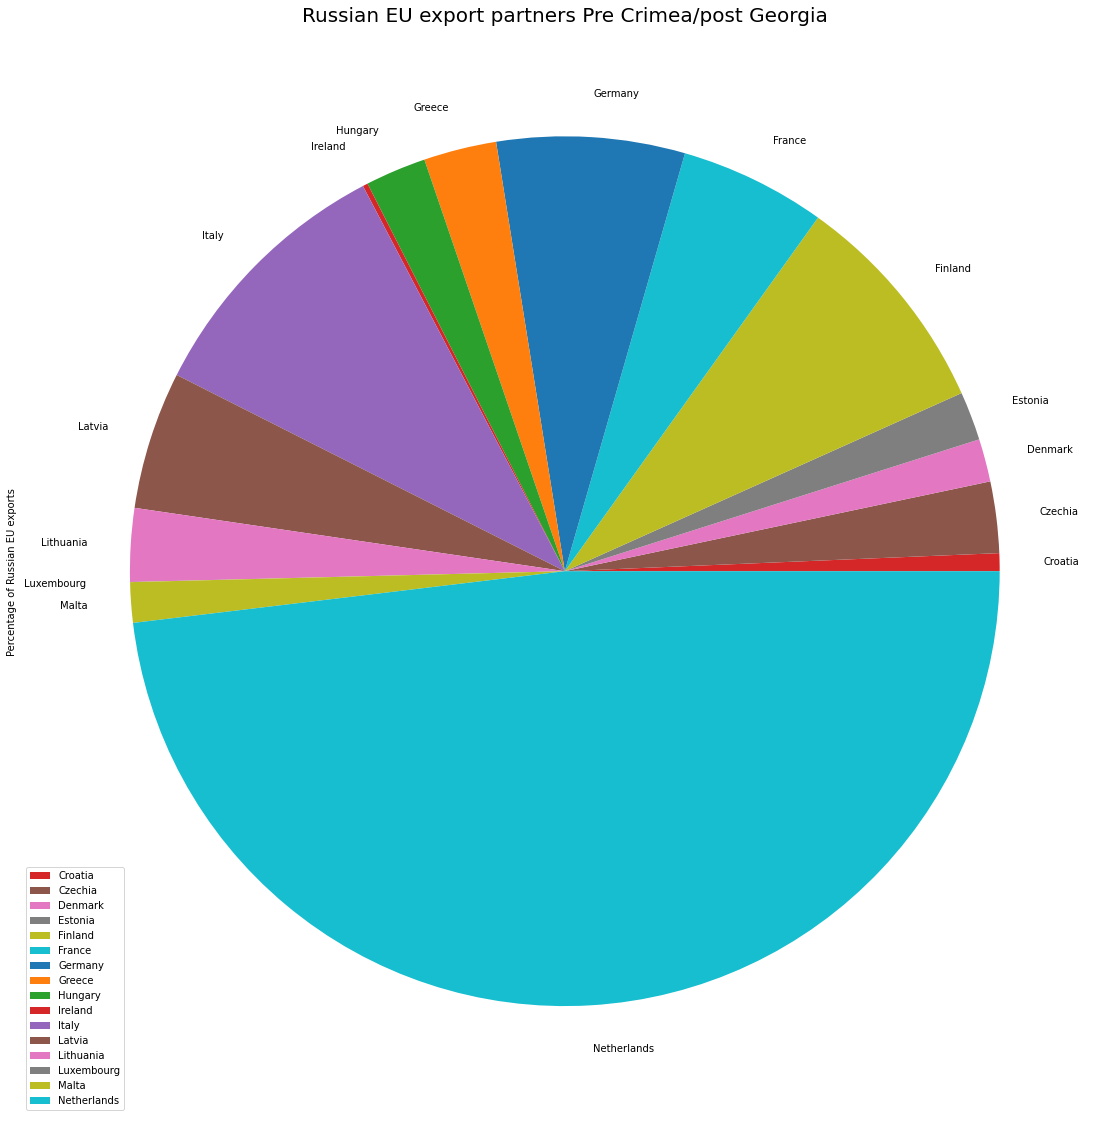

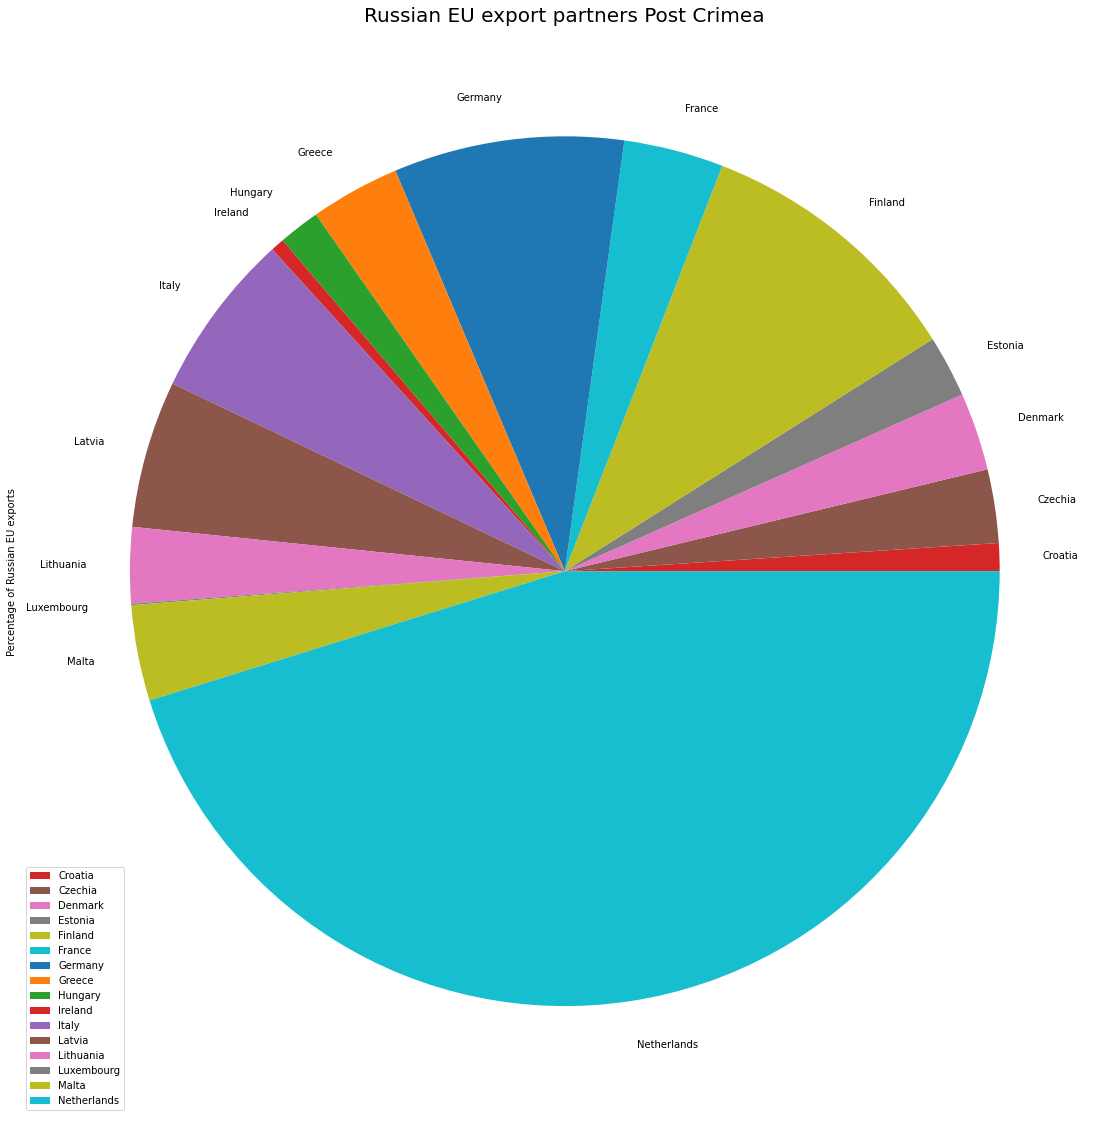

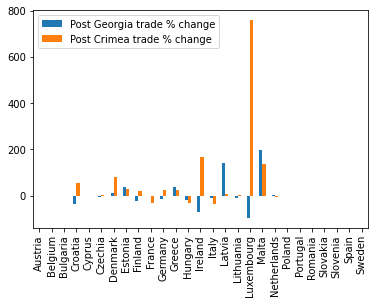

In [31]:
#Find the amount traded in exports with each country
pre_georgia_dataset = dataset[dataset['Year'] == 2007]

post_georgia_dataset = dataset[(dataset['Year'] >= 2009) 
                                        & (dataset['Year'] <= 2013)]
post_crimea_dataset = dataset[dataset['Year'] >= 2015]

#Displaying findings from the data over these two time periods
phase1 = eu_export_information(pre_georgia_dataset
                    , EU_countries, 'Pre Georgia')

phase2 = eu_export_information(post_georgia_dataset
                    , EU_countries, 'Pre Crimea/post Georgia')

phase3 = eu_export_information(post_crimea_dataset
                    , EU_countries, 'Post Crimea')
eu_export_changes(phase3, phase2, phase1, EU_countries)

USING XGBOOST TO PREDICT TRADE CLASSIFICATIONS WITH IMPRESSIVE RESULTS

[[2007 3 0 ... 2941254.0 2941254.0 791197]
 [2007 3 0 ... 40000.0 40000.0 23200]
 [2007 3 0 ... 340000.0 340000.0 185194]
 ...
 [2007 5 1 ... 2.0 0.0 47]
 [2007 5 1 ... 3208.0 3208.0 9245]
 [2007 5 1 ... 11.0 11.0 693]]
XGBoost Classification Accuracy is: 100.00 %
K-Fold-Cross-Validation Accuracy is: 100.00 %
K-Fold-Cross-Validation Standard Deviation is: 0.00 %


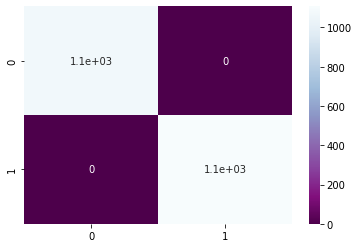

In [32]:
model_accuracy_trades(pre_georgia_dataset)

[[2009 3 0 ... 208832.0 208832.0 155547]
 [2009 3 0 ... 11069.0 11069.0 56733]
 [2009 3 0 ... 17237.0 17237.0 120956]
 ...
 [2010 5 1 ... 4.0 4.0 6]
 [2010 5 1 ... 4.0 4.0 173]
 [2011 5 1 ... 10.0 10.0 487]]
XGBoost Classification Accuracy is: 100.00 %
K-Fold-Cross-Validation Accuracy is: 100.00 %
K-Fold-Cross-Validation Standard Deviation is: 0.00 %


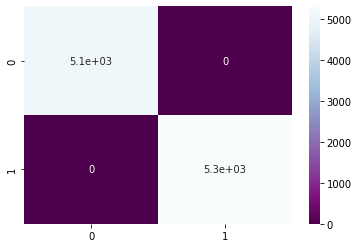

In [33]:
model_accuracy_trades(post_georgia_dataset)

[[2015 3 0 ... 273000.0 273000.0 193176]
 [2015 3 0 ... 12411089.0 12411089.0 5002408]
 [2015 3 0 ... 80000.0 80000.0 15539]
 ...
 [2018 5 1 ... 1.0 1.0 33]
 [2019 5 1 ... 25.0 25.0 304]
 [2020 5 1 ... 24.0 24.0 100]]
XGBoost Classification Accuracy is: 99.99 %
K-Fold-Cross-Validation Accuracy is: 100.00 %
K-Fold-Cross-Validation Standard Deviation is: 0.00 %


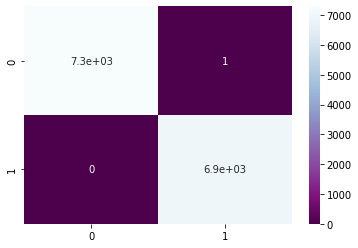

In [34]:
model_accuracy_trades(post_crimea_dataset)

USING RANDOM FOREST TO PREDICT AGGREGATES AS IT HAS MULTIPLE CLASSES

[[2007 0 'Croatia' ... 2941254.0 791197 1]
 [2007 0 'Croatia' ... 40000.0 23200 0]
 [2007 0 'Croatia' ... 340000.0 185194 1]
 ...
 [2007 1 'Netherlands' ... 0.0 47 0]
 [2007 1 'Netherlands' ... 3208.0 9245 0]
 [2007 1 'Netherlands' ... 11.0 693 0]]
RandomForest Classification Accuracy is: 96.60 %
K-Fold-Cross-Validation Accuracy is: 96.80 %
K-Fold-Cross-Validation Standard Deviation is: 0.69 %


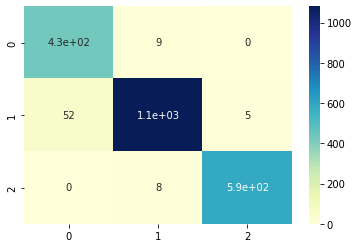

In [35]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
model_accuracy_aggregates(pre_georgia_dataset)

[[2009 0 'Croatia' ... 208832.0 155547 1]
 [2009 0 'Croatia' ... 11069.0 56733 1]
 [2009 0 'Croatia' ... 17237.0 120956 1]
 ...
 [2010 1 'Netherlands' ... 4.0 6 0]
 [2010 1 'Netherlands' ... 4.0 173 0]
 [2011 1 'Netherlands' ... 10.0 487 0]]
RandomForest Classification Accuracy is: 97.94 %
K-Fold-Cross-Validation Accuracy is: 98.21 %
K-Fold-Cross-Validation Standard Deviation is: 0.14 %


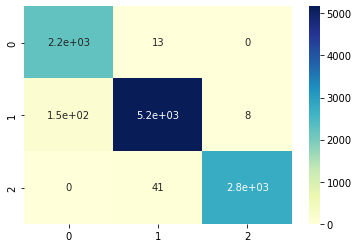

In [36]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
model_accuracy_aggregates(post_georgia_dataset)

[[2015 0 'Croatia' ... 273000.0 193176 1]
 [2015 0 'Croatia' ... 12411089.0 5002408 1]
 [2015 0 'Croatia' ... 80000.0 15539 0]
 ...
 [2018 1 'Netherlands' ... 1.0 33 0]
 [2019 1 'Netherlands' ... 25.0 304 0]
 [2020 1 'Netherlands' ... 24.0 100 0]]
RandomForest Classification Accuracy is: 97.89 %
K-Fold-Cross-Validation Accuracy is: 97.97 %
K-Fold-Cross-Validation Standard Deviation is: 0.21 %


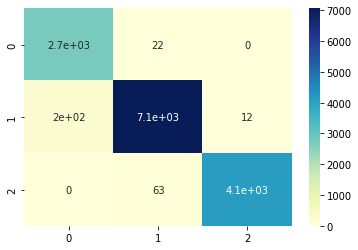

In [37]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
model_accuracy_aggregates(post_crimea_dataset)